Research Questions_Patrick Feng：

－Under Regular season, what the distributions of raptor_onoff_offense are for all teams.

－The differences between distributions of average onoff_offense of each team in two seasons.

－Under Regular season, what each team player's onoff_offense score is in MIA.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_function1 as fun

In [162]:
df = pd.read_csv("../data/raw/latest_RAPTOR_by_team.csv")
df

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,...,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036
1,Precious Achiuwa,achiupr01,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,...,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227
2,Jaylen Adams,adamsja01,2021,RS,MIL,41,18,-13.078112,-3.298021,-16.376133,...,-16.826146,-1.405129,-18.231275,-0.139591,-0.139591,0.000000,-12.863840,-4.114459,-16.978299,-1.834433
3,Steven Adams,adamsst01,2021,RS,NOP,3313,1605,-1.463698,2.084763,0.621065,...,-0.542297,1.044021,0.501724,2.630392,2.630392,0.000000,-0.728367,1.333237,0.604871,-1.226775
4,Bam Adebayo,adebaba01,2021,PO,MIA,293,136,-4.199527,-0.745652,-4.945179,...,-3.965209,1.679654,-2.285555,0.033852,0.000000,0.033852,-3.413399,1.575706,-1.837693,1.814533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Trae Young,youngtr01,2021,PO,ATL,1241,603,6.289696,-4.892762,1.396935,...,6.382340,-4.591438,1.790902,1.481875,0.000000,1.481875,9.627494,-5.119280,4.508214,2.794651
861,Trae Young,youngtr01,2021,RS,ATL,4449,2125,5.431654,-3.849879,1.581774,...,5.981243,-3.770601,2.210642,5.481497,5.481497,0.000000,5.723341,-4.382859,1.340482,1.939338
862,Cody Zeller,zelleco01,2021,RS,CHA,2113,1005,-0.658811,1.634766,0.975955,...,-0.135061,1.179117,1.044056,1.950657,1.950657,0.000000,-0.412836,1.035134,0.622298,0.272562
863,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-0.610172,3.128919,2.518747,...,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


In [163]:
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (865, 23)
Columns in the dataset: Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')


In [164]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
raptor_box_offense,865.0,-1.190280,5.029161,-46.708724,-2.690118,-0.878361,1.052860,25.867967
raptor_box_defense,865.0,-0.452295,5.073575,-25.382776,-2.244035,-0.334633,1.589149,66.957703
raptor_box_total,865.0,-1.642575,7.526838,-62.219863,-4.002939,-0.802503,1.754482,67.932330
raptor_onoff_offense,865.0,-2.544279,8.402711,-69.051553,-5.120859,-1.362247,1.629285,28.120957
raptor_onoff_defense,865.0,1.036961,8.677396,-52.889719,-2.148888,0.351031,3.185249,65.729833
raptor_onoff_total,865.0,-1.507318,10.583814,-88.047853,-5.202733,-0.874476,2.719564,55.960874
raptor_offense,865.0,-1.553084,5.329365,-43.366145,-3.123756,-0.982071,0.925080,22.564146
raptor_defense,865.0,-0.165898,5.397463,-30.938383,-2.091871,-0.131748,1.899592,71.024801
raptor_total,865.0,-1.718982,7.758748,-63.749646,-4.267638,-0.947591,1.790902,68.268286
war_total,865.0,0.963499,1.963746,-4.747338,-0.085045,0.219487,1.480337,15.756031


In [165]:
df.describe(include='object').T

,count,unique,top,freq
player_name,865,540,Blake Griffin,3
player_id,865,540,griffbl01,3
season_type,865,2,RS,626
team,865,30,BRK,42


In [166]:
df_cleaned = df.dropna(axis=0)
df_cleaned.shape

(865, 23)

In [167]:
#select useful columns
df_selected = df_cleaned.loc[0:,["player_name","season_type",'team','raptor_onoff_offense','raptor_onoff_defense','raptor_onoff_total']]
df_selected

,player_name,season_type,team,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Precious Achiuwa,PO,MIA,-12.897609,25.766232,12.868623
1,Precious Achiuwa,RS,MIA,-3.914412,-1.331056,-5.245468
2,Jaylen Adams,RS,MIL,-26.638723,7.257894,-19.380829
3,Steven Adams,RS,NOP,3.476686,-3.625787,-0.149101
4,Bam Adebayo,PO,MIA,-2.739389,11.060139,8.320750
...,...,...,...,...,...,...
860,Trae Young,PO,ATL,4.288689,-2.046628,2.242060
861,Trae Young,RS,ATL,6.509911,-2.413269,4.096641
862,Cody Zeller,RS,CHA,1.970177,-1.109227,0.860949
863,Ivica Zubac,PO,LAC,-6.870858,0.848330,-6.022529


In [168]:
df_selected1 = fun.specify(df_selected, "season_type", 'RS')
df_selected1

,player_name,season_type,team,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
1,Precious Achiuwa,RS,MIA,-3.914412,-1.331056,-5.245468
2,Jaylen Adams,RS,MIL,-26.638723,7.257894,-19.380829
3,Steven Adams,RS,NOP,3.476686,-3.625787,-0.149101
5,Bam Adebayo,RS,MIA,0.821585,0.139740,0.961325
6,LaMarcus Aldridge,RS,SAS,-1.886924,-2.351193,-4.238117
...,...,...,...,...,...,...
858,Delon Wright,RS,DET,1.915062,-0.396423,1.518639
859,Thaddeus Young,RS,CHI,7.684076,0.858760,8.542836
861,Trae Young,RS,ATL,6.509911,-2.413269,4.096641
862,Cody Zeller,RS,CHA,1.970177,-1.109227,0.860949


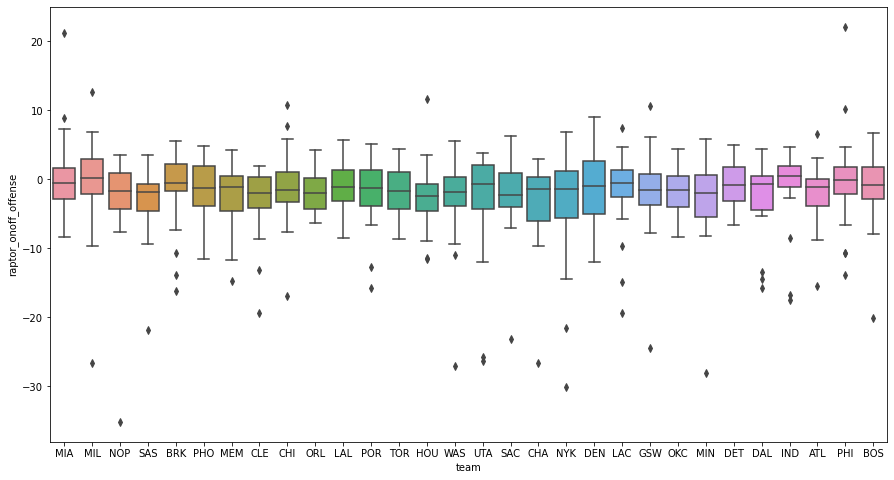

In [169]:
#Visualization 1
plt.figure(figsize=(15,8))
graph1 = sns.boxplot(x="team", y="raptor_onoff_offense", data=df_selected1)

<b>According to the graph, there are a great number of outliers.<br> Each team's median score is around 0.<br> Specifically, while the team NOP has the smallest outlier, the team MIA and PHI have the relatively largest outlier, which means they have better performance.

In [170]:
df1 = df_selected.groupby(['team','season_type'], as_index=False).mean()
df1

,team,season_type,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,ATL,PO,-3.020022,3.434441,0.414419
1,ATL,RS,-1.985181,-0.242952,-2.228133
2,BOS,PO,-7.422753,7.661126,0.238373
3,BOS,RS,-1.494755,0.608576,-0.886179
4,BRK,PO,1.227718,6.435652,7.663371
5,BRK,RS,-1.234759,-0.359847,-1.594607
6,CHA,RS,-3.640749,-0.285552,-3.926301
7,CHI,RS,-1.136816,2.849546,1.712730
8,CLE,RS,-3.142038,0.350206,-2.791832
9,DAL,PO,-5.499576,-4.782032,-10.281609


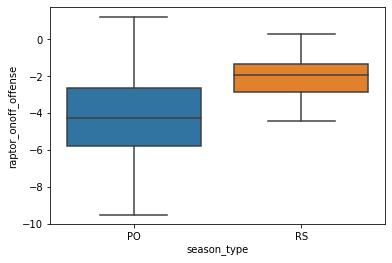

In [171]:
#Visualization 2
graph2 = sns.boxplot(x="season_type", y="raptor_onoff_offense", data=df1)

<b>In the PO, the raptor onoff offense score of each group fluctuate more widely, and their performance is very wide and uneven. <br>In the RS, the distribution is small and the fluctuation is not big, but the average score in the RS is higher than the average onoff offense score in the PO, which reflects the higher level of teams in the regular season. 

In [172]:
#Visualization 3
df2 = fun.specify(df1, "season_type", "RS")
df2[df2["raptor_onoff_offense"]==max(df2["raptor_onoff_offense"])]

,team,season_type,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
24,MIA,RS,0.320404,0.190681,0.511085


<b>Only the group MIA has the highest team member average onoff_offense score during regular season.<br>
Study the raptor onoff offense score distribution of team MIA players.

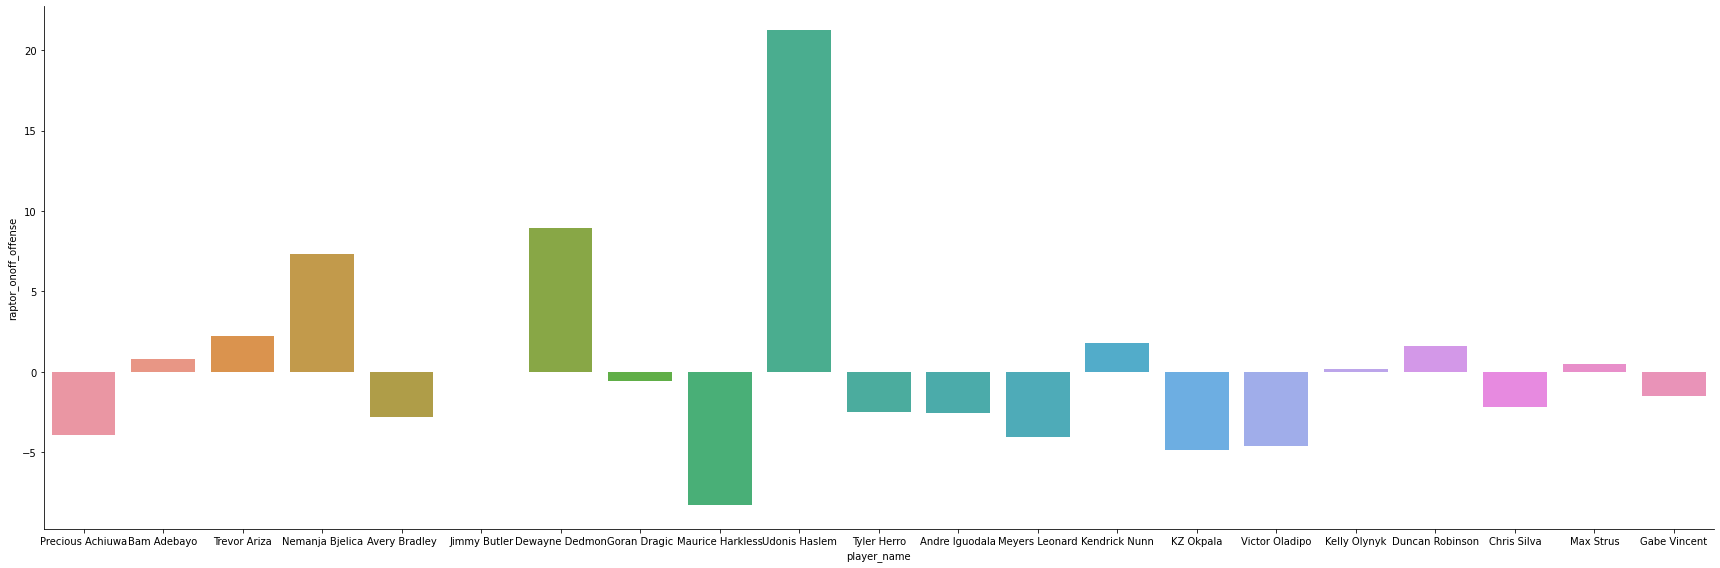

In [173]:
df3 = fun.specify(df_selected, "season_type", "RS")
df4 = fun.specify(df3, "team", "MIA")
graph3 = sns.catplot(x="player_name", y="raptor_onoff_offense", data = df4, kind ="bar", height=8, aspect=3)

<b>Udonis Haslem has highest raptor onoff offense score in team MIA, which means he has the best performance in this team.<br>
Even though there are also players with relatively lower raptor onoff offense scores, team MIA can has a relatively higher median score with Udonis Haslem.